In [52]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#loading dataset from sklearn
from sklearn.datasets import load_diabetes
data = pd.DataFrame(load_diabetes()["data"], columns = load_diabetes()["feature_names"])
data["target"] = load_diabetes()["target"]

In [54]:
#1. find the dimensions of the dataset
data.shape

(442, 11)

In [55]:
#2. look at first few recirds of the datasets
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [56]:
#3. look at the features names
list (data.columns)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

In [57]:
# 4. look at the data types of the features
data.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [58]:
#encode sex
data.loc [data["sex"]>0, "sex"] = 1
data.loc [data["sex"]<0, "sex"] = 0
data.head ()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1.0,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0.0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1.0,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0.0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0.0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [59]:
#5. look at statistical summary of the features
data.describe() # or data.describe () . T

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,0.468326,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,0.499561,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,0.000000,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,0.000000,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,0.000000,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,1.000000,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,1.000000,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [60]:
#6. store the numeric, categorical & target features names in seperate variables
#convert data type sex from float to int

data ["sex"] = data["sex"].astype(np.int8)
data.dtypes

age       float64
sex          int8
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [61]:
numeric_features = list(data.select_dtypes("float64").columns)
numeric_features.remove('target')
categorical_features = list(data.select_dtypes("int8").columns)
target = "taret"
print (f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntaeget:\n{target}')

numeric_features:
['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

categorical_features:
['sex']

taeget:
taret


In [62]:
#7. look for missing values in the features
np.round (data.isnull().mean() *100,1)

age       0.0
sex       0.0
bmi       0.0
bp        0.0
s1        0.0
s2        0.0
s3        0.0
s4        0.0
s5        0.0
s6        0.0
target    0.0
dtype: float64

In [63]:
#8. Looking at realtive frequencies of values of categorical features
for i in categorical_features:
    print(f'{i}\n{np.round((data[i].value_counts()/data[i].value_counts().sum()) *100,2)}')

sex
0    53.17
1    46.83
Name: sex, dtype: float64


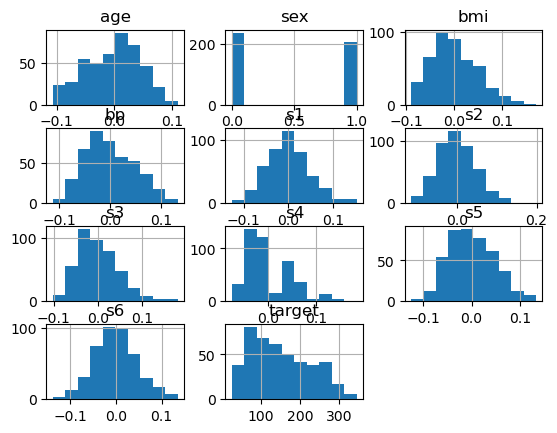

In [64]:
#9. looking at distributions of numeric features
#create histogram for numeric data
data.hist()

#show plot
plt.show()

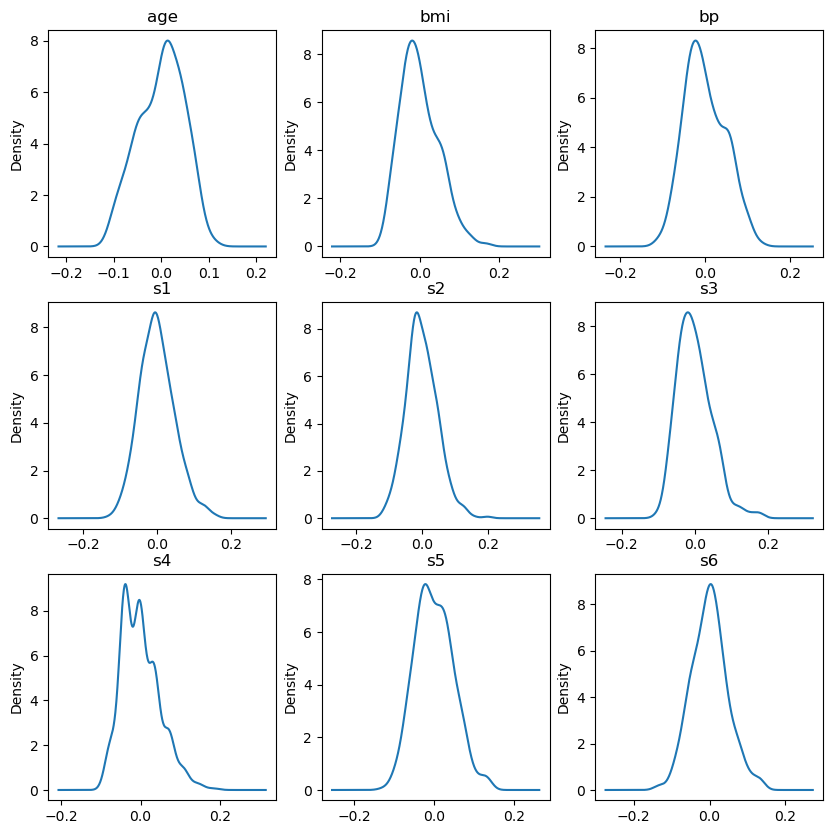

In [65]:
#9. looking at distribution of numeric features
fig,ax = plt.subplots(3,3,figsize=(10,10))
row = col = 0
for n,i in enumerate (numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    data[i].plot(kind = "kde", ax=ax[row,col])
    ax[row,col].set_title(i)
    col +=1

In [66]:
from scipy.stats import normaltest

for i in numeric_features:
    stat, p_value = normaltest(data[i].values)
    print(f'{i}: {"not gaussian" if p_value < 0.05 else "gaussian"} p-value: {p_value}')


age: not gaussian p-value: 1.0228182153991939e-05
bmi: not gaussian p-value: 7.262331793832974e-06
bp: not gaussian p-value: 0.00040537595836253937
s1: not gaussian p-value: 0.003682130413975528
s2: not gaussian p-value: 0.00012149451358987423
s3: not gaussian p-value: 4.0072679573118316e-11
s4: not gaussian p-value: 1.3014776207788022e-08
s5: not gaussian p-value: 0.039503377366703625
s6: gaussian p-value: 0.11673477122976575


In [67]:
# 10. Looking at relative standard deviation values with the median
for i in numeric_features:
    print(f'{i}: {np.abs(np.round((data[i].std() / data[i].median()) * 100, 2))}')


age: 884.61
bmi: 653.77
bp: 839.78
s1: 1102.07
s2: 1246.88
s3: 723.2
s4: 1836.97
s5: 2445.55
s6: 4418.59


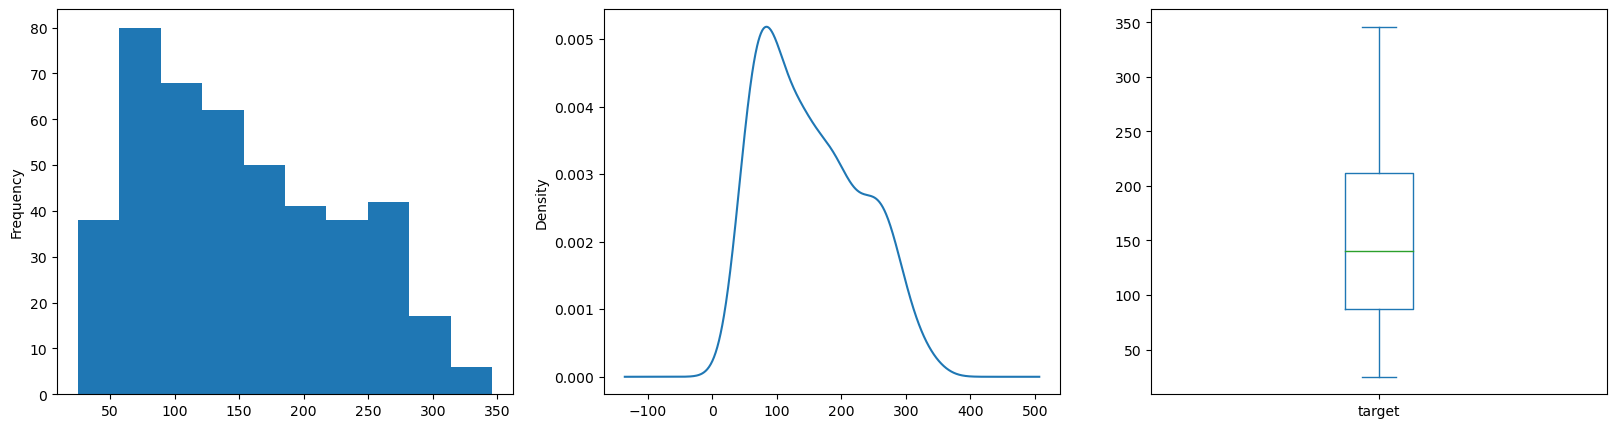

target: Not Gaussian p-value: 1.1743678801847827e-14


In [72]:
# 11. Looking at the target feature' statistics
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Histogram
data['target'].plot(kind="hist", ax=ax[0])

# Kernel Density Estimation (KDE)
data['target'].plot(kind="kde", ax=ax[1])

# Box plot
data['target'].plot(kind="box", ax=ax[2])

plt.show()

# Check if the target is Gaussian using the normaltest
statistic, p_value = normaltest(data['target'].values)
print(f'target: {"Not Gaussian" if p_value < 0.05 else "Gaussian"} p-value: {p_value}')


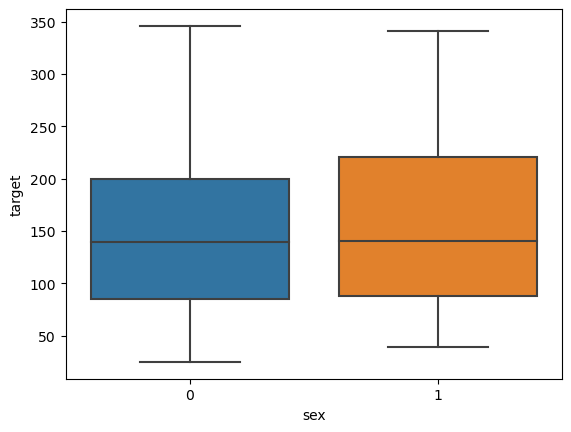

In [76]:
import seaborn as sns

# 12. Looking at the relationship between categorical and target features
sns.boxplot(x=data[categorical_features[0]], y=data['target'])
plt.show()


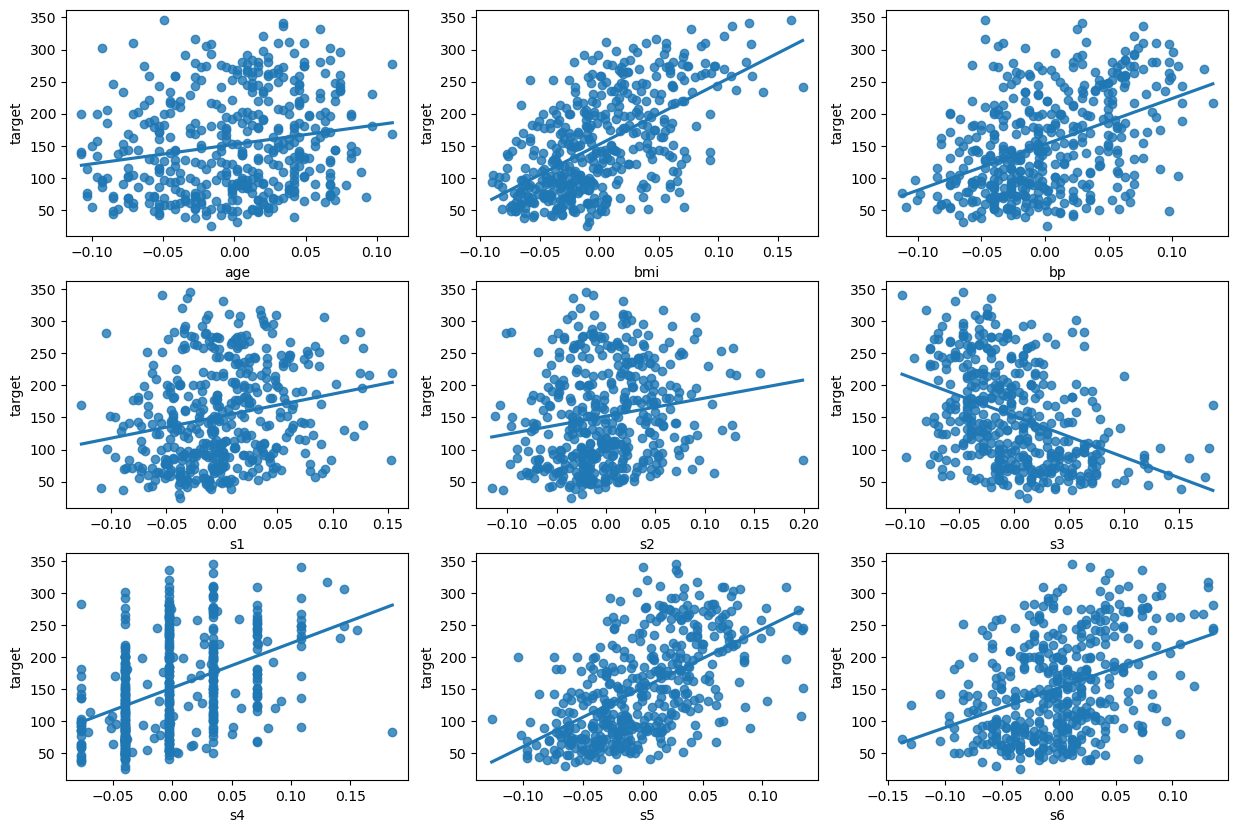

In [77]:
#13. looking at the relationship between numeric and target features
fig,ax = plt.subplots (3,3,figsize = (15,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.regplot (x=i, y="target", data = data, ax=ax [row,col], ci= False)
    col += 1

<Axes: >

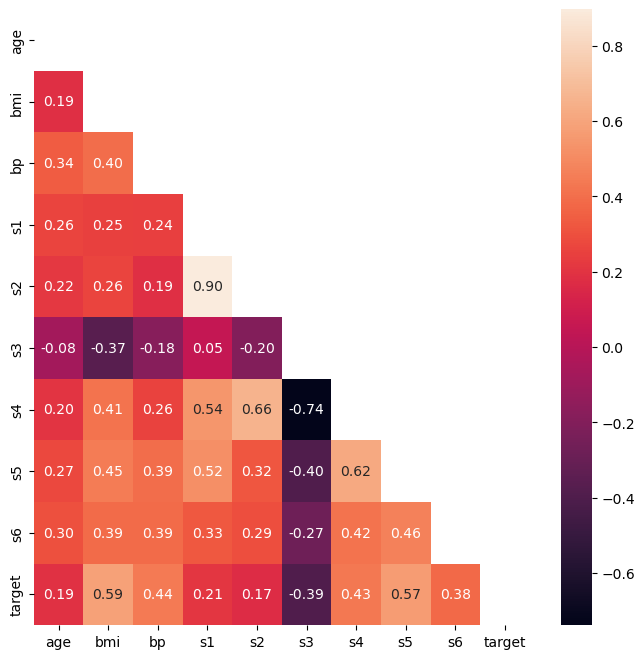

In [78]:
num_tgt = numeric_features.copy()
num_tgt.append('target')

fig = plt.figure(figsize=(8, 8))
sns.heatmap(data[num_tgt].corr(method='pearson'), annot=True, fmt='.2f', mask=np.triu(data[num_tgt].corr(method='pearson')))


<Axes: >

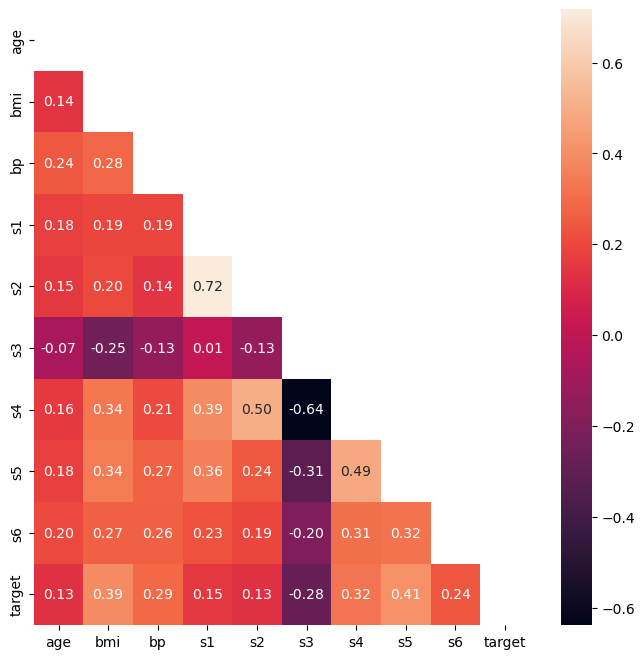

In [79]:
fig = plt.figure(figsize=(8, 8))
sns.heatmap(data[num_tgt].corr(method='kendall'), annot=True, fmt='.2f', mask=np.triu(data[num_tgt].corr(method='pearson')))
